# **Analisis klaster pelanggan toko online**


## **Businnes Understanding**
Menggunakan algoritma K-means dan metodologi CRISP-DM untuk mengklaster pelanggan berdasarkan perilaku pembelian

## **Data Understanding**


In [6]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
# hubungkan ke gdrive
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# membaca file dataset
file_path = f'{path}/My Drive/data mining tb/salinan_customer_shopping_data_news.csv'
df_new = pd.read_csv(file_path)
df_new

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,invoice_date,shopping_mall,frequency,unit_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1,600.17
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1,600.17
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1,11.73
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1,5.23
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1,5.23
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1,1050.00


## **Data Preparation**

In [9]:
# drop kolom yang tidak digunakan
column = ['shopping_mall', 'invoice_date', 'frequency']
df_new = df_new.drop(column, axis = 1)
df_new

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,600.17
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,600.17
4,I337046,C189076,Female,53,Books,4,60.60,Cash,15.15
...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,11.73
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,5.23
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,5.23
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,1050.00


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   total_prices    99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   unit_price      99457 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 6.8+ MB


In [11]:
df_new.describe()

,age,quantity,total_prices,unit_price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,229.280048
std,14.990054,1.413025,941.184567,266.047550
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,35.840000
50%,43.000000,3.000000,203.300000,40.660000
75%,56.000000,4.000000,1200.320000,300.080000
max,69.000000,5.000000,5250.000000,1050.000000


In [12]:
# Membuat mapping dari kategori ke angka
category_mapping = {category: idx for idx, category in enumerate(df_new['category'].unique())}
df_new['category'] = df_new['category'].map(category_mapping)

In [13]:
df_new['gender'] = df_new['gender'].map({'Male': 1, 'Female': 0})

In [14]:
payment_method_mapping = {payment_method: idx for idx, payment_method in enumerate(df_new['payment_method'].unique())}
df_new['payment_method'] = df_new['payment_method'].map(payment_method_mapping)

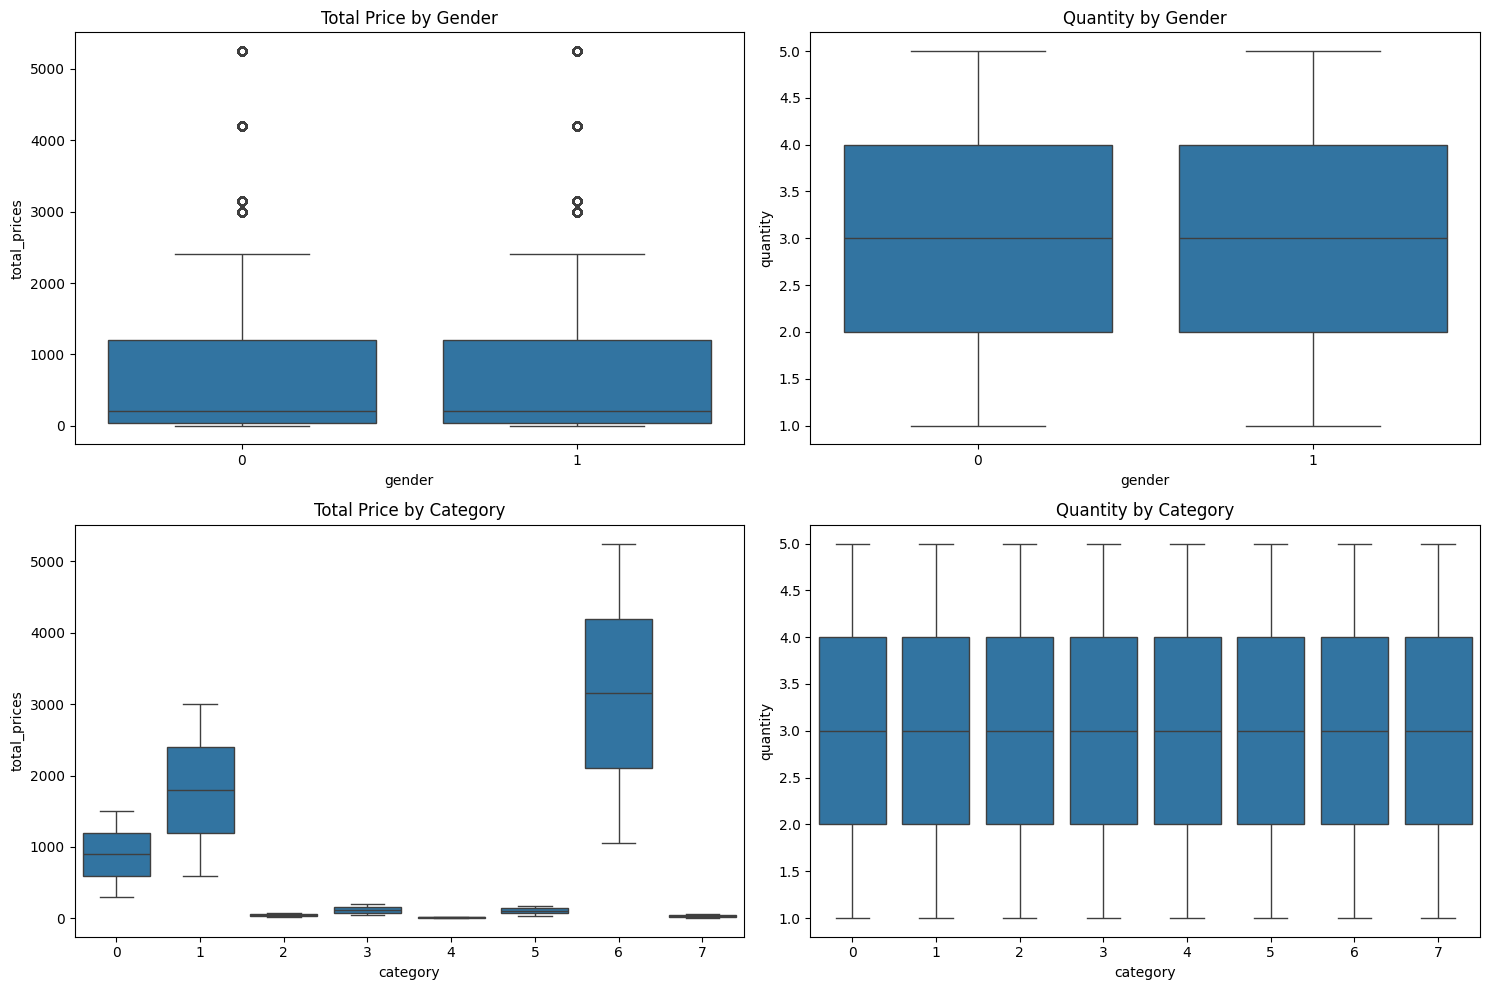

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'total_price' separated by 'gender'
plt.subplot(2, 2, 1)
sn.boxplot(x='gender', y='total_prices', data=df_new)
plt.title('Total Price by Gender')

# Box plot for 'quantity' separated by 'gender'
plt.subplot(2, 2, 2)
sn.boxplot(x='gender', y='quantity', data=df_new)
plt.title('Quantity by Gender')

# Box plot for 'total_price' separated by 'category'
plt.subplot(2, 2, 3)
sn.boxplot(x='category', y='total_prices', data=df_new)
plt.title('Total Price by Category')

# Box plot for 'quantity' separated by 'category'
plt.subplot(2, 2, 4)
sn.boxplot(x='category', y='quantity', data=df_new)
plt.title('Quantity by Category')

plt.tight_layout()
plt.show()


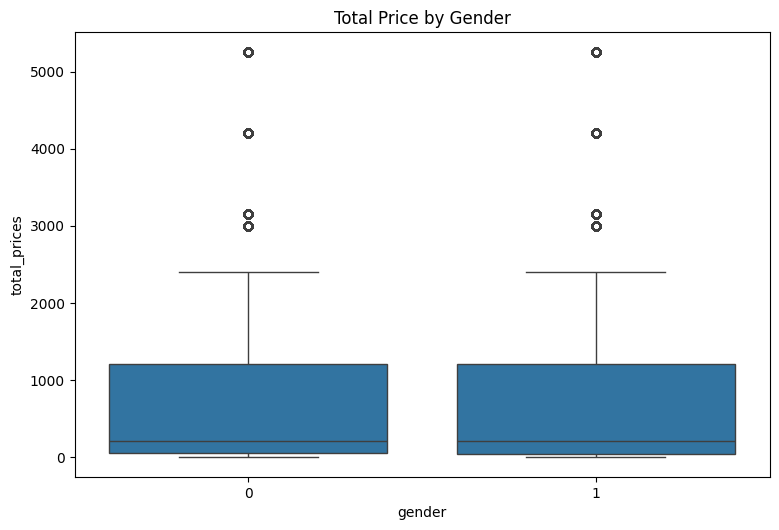

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'total_price' separated by 'gender'
plt.subplot(2, 2, 1)
sn.boxplot(x='gender', y='total_prices', data=df_new)
plt.title('Total Price by Gender')

plt.tight_layout()
plt.show()

In [17]:
group = df_new.groupby('gender')['total_prices'].describe()
group

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,59482.0,688.137615,940.791874,5.23,45.45,203.3,1200.32,5250.0
1,39975.0,690.920933,941.777893,5.23,40.66,203.3,1200.32,5250.0


In [37]:
shows1 = df_new[df_new['gender'] == 0].groupby('total_prices').size().reset_index(name='count').sort_values(by='total_prices', ascending=False)
shows1

,total_prices,count
39,5250.00,609
38,4200.00,599
37,3150.00,574
36,3000.85,1191
35,2400.68,1214
34,2100.00,615
33,1800.51,1165
32,1500.40,4130
31,1200.34,1203
30,1200.32,4131


In [38]:
shows2 = df_new[df_new['gender'] == 1].groupby('total_prices').size().reset_index(name='count').sort_values(by='total_prices', ascending=False)
shows2

,total_prices,count
39,5250.00,392
38,4200.00,402
37,3150.00,435
36,3000.85,822
35,2400.68,808
34,2100.00,385
33,1800.51,845
32,1500.40,2810
31,1200.34,842
30,1200.32,2718


In [41]:
group1 = df_new[df_new['gender'] == 0].sort_values(by='total_prices', ascending=False)
group1

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price
52236,I334584,C269598,0,36,6,5,5250.00,2,1050.00
14540,I249941,C172759,0,39,6,5,5250.00,0,1050.00
68209,I287954,C134132,0,60,6,5,5250.00,0,1050.00
57100,I102332,C116250,0,68,6,5,5250.00,2,1050.00
7559,I148353,C138646,0,38,6,5,5250.00,2,1050.00
...,...,...,...,...,...,...,...,...,...
10254,I115391,C838295,0,29,4,1,5.23,1,5.23
10263,I682592,C140430,0,37,4,1,5.23,2,5.23
21627,I251965,C126422,0,64,4,1,5.23,0,5.23
94077,I965921,C119416,0,64,4,1,5.23,2,5.23


In [42]:
group2 = df_new[df_new['gender'] == 1].sort_values(by='total_prices', ascending=False)
group2

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price
60133,I257096,C188738,1,18,6,5,5250.00,2,1050.00
61908,I680998,C124336,1,29,6,5,5250.00,2,1050.00
19311,I124802,C297452,1,24,6,5,5250.00,1,1050.00
77076,I118641,C327696,1,34,6,5,5250.00,2,1050.00
7068,I260538,C192559,1,37,6,5,5250.00,2,1050.00
...,...,...,...,...,...,...,...,...,...
45091,I961945,C190261,1,48,4,1,5.23,2,5.23
31749,I565570,C181588,1,65,4,1,5.23,1,5.23
53144,I224722,C181663,1,66,4,1,5.23,2,5.23
87865,I334121,C152555,1,40,4,1,5.23,2,5.23


In [43]:
mean_group1 = group1['total_prices'].mean()
mean_group2 = group2['total_prices'].mean()

print(f'mean group1: {mean_group1}')
print(f'mean group2: {mean_group2}')

mean group1: 688.1376150768299
mean group2: 690.9209328330206
